In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

<Axes: >

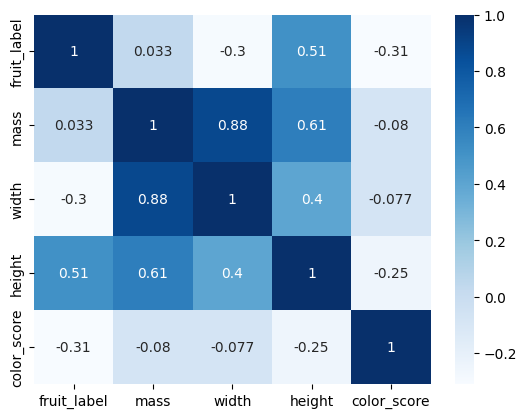

In [5]:
data = pd.read_table('Fruits_Data.txt')[['fruit_label', 'mass', 'width', 'height', 'color_score']]
[['fruit_subtype', 'fruit_name']]

# calculate the correlation
corr = data.corr()
# plot the heatmap
sns.heatmap(corr, cmap='Blues', annot=True)

## Split the data and Train the model

In [7]:
X = data[['mass', 'width', 'height']]
y = data['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
scr = knn.score(X_test, y_test)
print('Score for your model is', scr)

Score for your model is 0.75


## Predict the new input data

In [8]:
# 1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'
res = knn.predict([[120, 6.0, 8.4]])
if res == 1:
    print('Apple')
elif res == 2:
    print('Mandarim')
elif res == 3:
    print('Orange')
else:
    print('Lemon')

Lemon


C:\Users\xgabr\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Find the best K Value

True

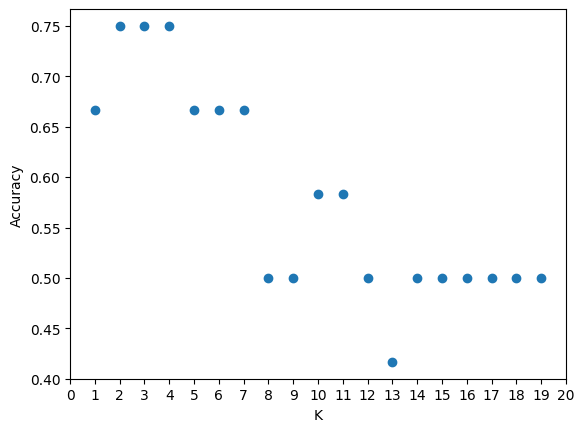

In [11]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([x for x in range(0, 21)])
True